### Plotting Error Bars in Python using Matplotlib and Numpy Random

A friend of mine needed help with plotting clusters with corresponding asymmetrical error bars. I decided to write a blog post about plotting error bars in Python after helping with the problem.

#### Error Bars

Error bars are graphical representations of the error or uncertainty in data, and they assist correct interpretation. For scientific purposes, reporting of errors is crucial in understanding the given data. Mostly error bars represent range and standard deviation of a dataset. They can help visualize how the data is spread around the mean value.

#### The Data

The data shown below is randomly generated for plotting purposes. This blog post is not about correct statistical interpretation of error bars, and solely written for demonstration purposes.

We will be using __numpy__ for data generation. Let's start by importing numpy.

In [1]:
# Importing numpy
import numpy as np
np.__version__

'1.14.0'

Numpy has helpful random number generators included in it. The data can be generated from various distributions. Let's look at few of them that we are going to use in our example:

* __*numpy.random.rand()*__: Numpy creates an array of a given shape with random samples from a uniform distribution in a range from 0 to 1. If no argument is given, then a single float is returned.

* __*numpy.random.uniform()*__: Similar to .rand(), Numpy draws samples from uniform distribution. However, this time we can specify lower and upper boundaries for sample generation, while including the lower boundary and generating samples up to upper boundary.

* __*numpy.random.randn()*__: Numpy creates an array of a given shape with random samples from a standard normal distribution with a mean of 0 and variance 1. If no argument is given, then a single float is returned.

For the complete list of available distributions please check the [link](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html).

We are also going to use __.seed__ function in the examples below for reproducibility of the data.

Let's look at the examples of random number generation:

In [2]:
# For reproducibility of the data
np.random.seed(5)

# Uniformly distributed array of random sample
# in a shape of 4 by 3
print('rand:\n', np.random.rand(4,3))

# Random array of length of 10 from [2, 5) from
# a uniform distribution
print('\nuniform:\n', np.random.uniform(2, 5, 10))

# Random samples from standard normal distribution
print('\nrandn:\n', np.random.randn(10))

rand:
 [[0.22199317 0.87073231 0.20671916]
 [0.91861091 0.48841119 0.61174386]
 [0.76590786 0.51841799 0.2968005 ]
 [0.18772123 0.08074127 0.7384403 ]]

uniform:
 [3.32392767 2.4749296  4.63981109 2.82225939 3.24270506 2.8882398
 3.88636373 3.73951343 3.79978759 2.79745735]

randn:
 [-0.98060789 -0.85685315 -0.87187918 -0.42250793  0.99643983  0.71242127
  0.05914424 -0.36331088  0.00328884 -0.10593044]


#### Basic Error Bars

In the example below we are going to create random data for plotting basic error bars.

In [3]:
# For reproducibility of the data
np.random.seed(5)

# Creating the data
X = np.arange(1, 12)
Y = np.cos(X) + 2 * np.random.randn(11) + 4

# Basic error
Y_error = 0.6

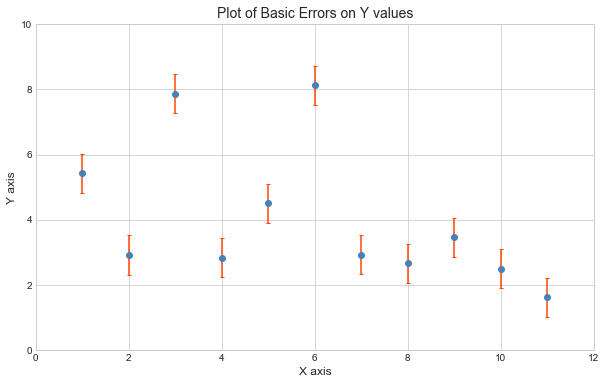

In [4]:
# Importing matplotlib for plotting, and seaborn for styling
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the error bars
ax.errorbar(X, Y, yerr=Y_error, fmt='o', ecolor='orangered',
            color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Plot of Basic Errors on Y values', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

The markers are customizable. For more detailed markers list available in matplotlib please check the [link](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot).

#### Symmetric Error Bars example

Let's look at symmetric Error Bars. Contrary to the previous example, the error data for the example below is generated by using numpy's random function.

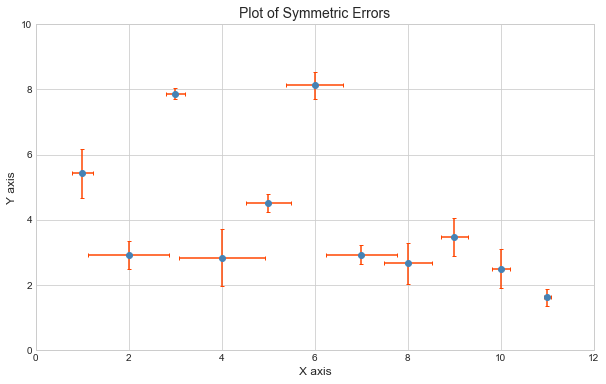

In [5]:
# For reproducibility of the data
np.random.seed(5)

# Creating error data
X_error = np.random.rand(11)
Y_error = np.random.rand(11)

# Defining the figure, and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the error bars
ax.errorbar(X, Y, xerr=X_error, yerr=Y_error, fmt='o',
             ecolor='orangered', color='steelblue', capsize=2)

# Adding plotting parameters
ax.set_title('Plot of Symmetric Errors', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);

The example below is another plotting example for __symmetric error bars__. We are randomly generating two data sets with corresponding error values on Y scale. As is it stated above, the example is not for correct statistical interpretation, but for demonstration purposes. 

In [6]:
# For reproducibility of the data
np.random.seed(7)

# Importing uniform distribution
from numpy.random import uniform

# Creating trial values
X1 = np.arange(1, 12)
X2 = X1 + 0.1

# Y values corresponding to X values
Y1 = 2.5 / X1 + uniform(0.2, 0.5, len(X1))
Y2 = 3 / X1  + uniform(0.8, 1.2, len(X1))

# Errors for the plot
Y1_error = uniform(0.25, 0.6, len(X1))
Y2_error = uniform(0.25, 0.6, len(X1))

__matplotlib__ allows us to save some coding space by grouping same parameters under __**kwargs__ dictionary, which is demonstrated in the code below.

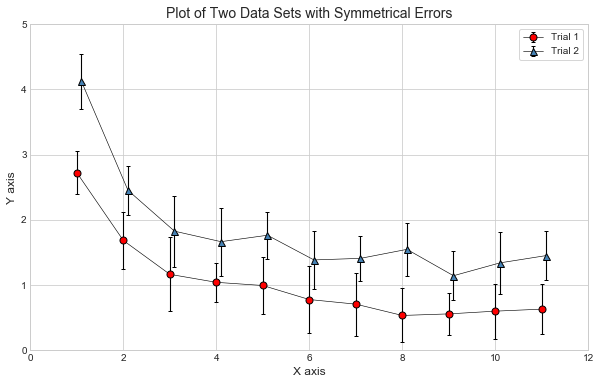

In [7]:
# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Parameters that are same for both lines,
# in the form of a dictionary
kwargs = dict(ecolor='k', color='k', capsize=2,
              elinewidth=1.1, linewidth=0.6, ms=7)

# Plotting two data sets with the error bars
ax.errorbar(X1, Y1, yerr=Y1_error, fmt='-o', mfc='r', **kwargs, label='Trial 1')
ax.errorbar(X2, Y2, yerr=Y2_error, fmt='-^', mfc='steelblue', **kwargs, label='Trial 2')

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)

# Adding plotting parameters
ax.set_title('Plot of Two Data Sets with Symmetrical Errors', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 5);

#### Asymmetric Error Bars example

Let's take the plotting a step further. Let's imagine that we have a data of 11 clusters, and we need to plot each cluster in different color. Also asymmetric error data for X values need to be plotted. The data is given in the format of upper and lower errors. 

As in the previous examples, we will be randomly generating these lower and upper limits for demonstration purposes.

In [8]:
# For reproducibility of the data
np.random.seed(5)

# Creating lower and upper error data for X values
X_lower = np.random.rand(11)
X_upper = np.random.rand(11) * 2

We can manually define the color list. We can also import a colormap included in matplotlib, then export the colors to a new array, and use this array for the purpose of the example. The exported values are in a format RGBA.

In [9]:
# Importing colormap module
import matplotlib.cm as cm

# Creating an empty array
color_array = []

# Appending RGBA values to a new array
for i in range(20):
    color_array.append(cm.get_cmap('tab20')(i))

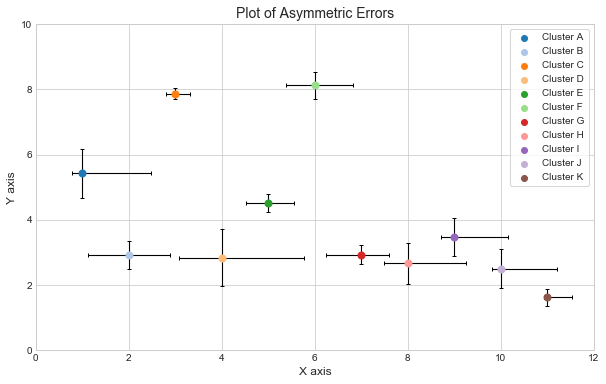

In [10]:
# Creating string with cluster letters
letters = 'ABCDEFGHIJK'

# Defining the figure and figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Looping through the letters and plotting the points
for i, letter in enumerate(letters):
    ax.errorbar(X[i], Y[i], xerr=[[X_lower[i]], [X_upper[i]]],
                yerr=Y_error[i], fmt='o', capsize=2, elinewidth=1.1,
                ms=7, ecolor='k', color=color_array[i])
    # Adding scatter plot to print the legend
    ax.scatter([], [], c=color_array[i], label='Cluster ' + letter)

# Adding legend to the plot    
ax.legend(loc='best', frameon=True)

# Adding plotting parameters
ax.set_title('Plot of Asymmetric Errors', fontsize=14)
ax.set_xlabel('X axis', fontsize=12)
ax.set_ylabel('Y axis', fontsize=12)
ax.set_xlim(0, 12)
ax.set_ylim(0, 10);